### Deliverable 3: Optimize the Model

In [2]:
# Import our dependencies
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [4]:
for x in application_df.columns:
    print(x, application_df[x].nunique())

EIN 34299
NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [5]:
application_df["NAME"].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN"])
application_df.head()

NAME APPLICATION_TYPE  \
0              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [7]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

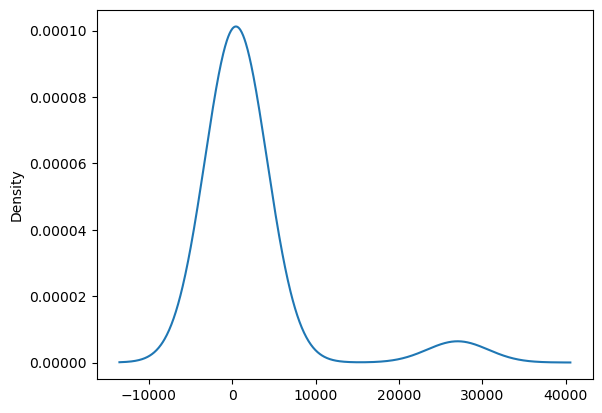

In [9]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df.CLASSIFICATION.value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

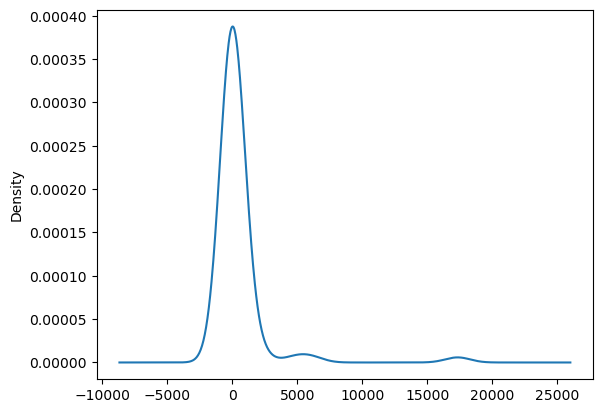

In [12]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_count[class_count < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df.NAME.value_counts()
class_count

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

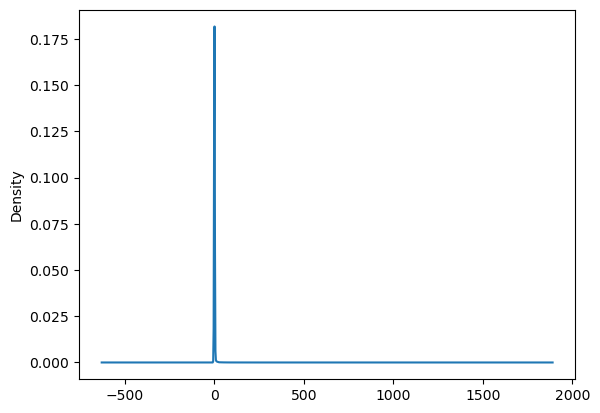

In [15]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [16]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_count[class_count < 5].index)

# Replace in dataframe
for cls in replace_class:
    application_df.NAME = application_df.NAME.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [17]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\maced\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NAME_AACE INTERNATIONAL  NAME_ACE MENTOR PROGRAM OF AMERICA INC  \
0                      0.0                                     0.0   
1                      0.0                                     0.0   
2                      0.0                                     0.0   
3                      0.0                                     0.0   
4                      0.0                                     0.0   

   NAME_ACTS MINISTRY  NAME_ACTS MISSIONS  \
0                 0.0                 0.0   
1                 0.0                 0.0   
2                 0.0                 0.0   
3                 0.0                 0.0   
4                 0.0                 0.0   

   NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                0.0               
4                                                0.0               

   NAME_AIR FORCE ASSOCIATION  NAME_ALABAMA FEDERATION OF WOMENS CLUBS  \
0                         0.0                                      0.0   
1                         0.0                                      0.0   
2                         0.0                                      0.0   
3                         0.0                                      0.0   
4                         0.0                                      0.0   

   NAME_ALABAMA TREASURE FOREST ASSOCIATION  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   NAME_ALPHA PHI OMEGA  ...  INCOME_AMT_1-9999  INCOME_AMT_10000-24999  \
0                   0.0  ...                0.0                     0.0   
1                   0.0  ...                1.0                     0.0   
2                   0.0  ...                0.0                     0.0   
3                   0.0  ...                0.0                     1.0   
4                   0.0  ...                0.0                     0.0   

   INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  \
0                       0.0                 0.0               0.0   
1                       0.0                 0.0               0.0   
2                       0.0                 0.0               0.0   
3                       0.0                 0.0               0.0   
4                       1.0                 0.0               0.0   

   INCOME_AMT_25000-99999  INCOME_AMT_50M+  INCOME_AMT_5M-10M  \
0                     0.0              0.0                0.0   
1                     0.0              0.0                0.0   
2                     0.0              0.0                0.0   
3                     0.0              0.0                0.0   
4                     0.0              0.0                0.0   

   SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                       1.0                       0.0  
1                       1.0                       0.0  
2                       1.0                       0.0  
3                       1.0                       0.0  
4                       1.0                       0.0  

[5 rows x 444 columns]

In [19]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\maced\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  ASK_AMT  IS_SUCCESSFUL  NAME_AACE INTERNATIONAL  \
0       1     5000              1                      0.0   
1       1   108590              1                      0.0   
2       1     5000              0                      0.0   
3       1     6692              1                      0.0   
4       1   142590              1                      0.0   

   NAME_ACE MENTOR PROGRAM OF AMERICA INC  NAME_ACTS MINISTRY  \
0                                     0.0                 0.0   
1                                     0.0                 0.0   
2                                     0.0                 0.0   
3                                     0.0                 0.0   
4                                     0.0                 0.0   

   NAME_ACTS MISSIONS  \
0                 0.0   
1                 0.0   
2                 0.0   
3                 0.0   
4                 0.0   

   NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                0.0               
4                                                0.0               

   NAME_AIR FORCE ASSOCIATION  NAME_ALABAMA FEDERATION OF WOMENS CLUBS  ...  \
0                         0.0                                      0.0  ...   
1                         0.0                                      0.0  ...   
2                         0.0                                      0.0  ...   
3                         0.0                                      0.0  ...   
4                         0.0                                      0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 447 columns]

In [20]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\maced\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               44700     
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 30)                2430      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 55,241
Trainable params: 55,241
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Define the checkpoint path and filenames
os.makedirs("Resources/checkpoints3/",exist_ok=True)
checkpoint_path = "Resources/checkpoints3/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5
)

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 39:56 - loss: 0.7108 - accuracy: 0.3750
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6619 - accuracy: 0.6125   
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.6153 - accuracy: 0.6719
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.5961 - accuracy: 0.6885
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.5821 - accuracy: 0.6984
Epoch 1: saving model to Resources/checkp

378/804 [=============>................] - ETA: 2s - loss: 0.4845 - accuracy: 0.7637
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.4838 - accuracy: 0.7640
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.4826 - accuracy: 0.7646
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.4810 - accuracy: 0.7658
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.4793 - accuracy: 0

774/804 [===========================>..] - ETA: 0s - loss: 0.4635 - accuracy: 0.7768
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4634 - accuracy: 0.7770
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5

Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4629 - accuracy: 0.7773
Epoch 1: saving model to Resources/checkpoints3\weights.01.hdf5
804/804 [==============================] - 7s 6ms/step - loss: 0.4626 - accuracy: 0.7774
Epoch 2/100

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
  1/804 [..............................] - ETA: 14s - loss: 0.4017 - accuracy: 0.8125
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkp

352/804 [============>.................] - ETA: 2s - loss: 0.4310 - accuracy: 0.7939
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.4313 - accuracy: 0.7933
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.4329 - accuracy: 0.7924
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.4315 - accuracy: 0.7930
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.4316 - accuracy: 0


Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4311 - accuracy: 0.7948
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4314 - accuracy: 0.7947
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4315 - accuracy: 0.7946
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.7944
Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5

Epoch 2: saving model to Resources/checkpoints3\weights.02.hdf5
796/804 [=====

323/804 [===========>..................] - ETA: 2s - loss: 0.4293 - accuracy: 0.7918
Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5

Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.4298 - accuracy: 0.7911
Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5

Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.4277 - accuracy: 0.7928
Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5

Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.4277 - accuracy: 0.7928
Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5

Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.4284 - accuracy: 0.7926
Epoch 3: saving model to Resources/checkpoints3\weights.03.

714/804 [=========================>....] - ETA: 0s - loss: 0.4275 - accuracy: 0.7944
Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5

Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.4273 - accuracy: 0.7942
Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5

Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.4271 - accuracy: 0.7945
Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5

Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.4262 - accuracy: 0.7950
Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5

Epoch 3: saving model to Resources/checkpoints3\weights.03.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.4259 - accuracy: 0.7952
Epoch 3: saving model to Resources/checkpoints3\weights.03.


Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.4218 - accuracy: 0.8001
Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.4233 - accuracy: 0.7991
Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.4228 - accuracy: 0.7997
Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.4227 - accuracy: 0.7994
Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.4224 - accuracy: 0

685/804 [========================>.....] - ETA: 0s - loss: 0.4231 - accuracy: 0.7974
Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.4236 - accuracy: 0.7973
Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.4236 - accuracy: 0.7971
Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.4235 - accuracy: 0.7970
Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5

Epoch 4: saving model to Resources/checkpoints3\weights.04.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.4239 - accuracy: 0


Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.4214 - accuracy: 0.7972
Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.4209 - accuracy: 0.7976
Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.4210 - accuracy: 0.7973
Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.4215 - accuracy: 0.7976
Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
312/804 [=====

655/804 [=======================>......] - ETA: 0s - loss: 0.4214 - accuracy: 0.7990
Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.4211 - accuracy: 0.7991
Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.4213 - accuracy: 0.7989
Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.4216 - accuracy: 0.7987
Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5

Epoch 5: saving model to Resources/checkpoints3\weights.05.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.4214 - accuracy: 0.7988
Epoch 5: saving model to Resources/checkpoints3\weights.05.

225/804 [=======>......................] - ETA: 3s - loss: 0.4090 - accuracy: 0.8075
Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5

Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.4098 - accuracy: 0.8064
Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5

Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.4101 - accuracy: 0.8069
Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5

Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.4110 - accuracy: 0.8064
Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5

Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.4127 - accuracy: 0.8050
Epoch 6: saving model to Resources/checkpoints3\weights.06.

600/804 [=====================>........] - ETA: 1s - loss: 0.4197 - accuracy: 0.7998
Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5

Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.4197 - accuracy: 0.7996
Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5

Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.4206 - accuracy: 0.7989
Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5

Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.4212 - accuracy: 0.7988
Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5

Epoch 6: saving model to Resources/checkpoints3\weights.06.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.4214 - accuracy: 0.7987
Epoch 6: saving model to Resources/checkpoints3\weights.06.


Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.4157 - accuracy: 0.8024
Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5

Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.4148 - accuracy: 0.8025
Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5

Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.4177 - accuracy: 0.8005
Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5

Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.4170 - accuracy: 0.8004
Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5

Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.4177 - accuracy: 0

561/804 [===================>..........] - ETA: 1s - loss: 0.4200 - accuracy: 0.7985
Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5

Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.4201 - accuracy: 0.7984
Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5

Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.4198 - accuracy: 0.7985
Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5

Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.4199 - accuracy: 0.7985
Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5

Epoch 7: saving model to Resources/checkpoints3\weights.07.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.4191 - accuracy: 0.7989
Epoch 7: saving model to Resources/checkpoints3\weights.07.


Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.4273 - accuracy: 0.7997
Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.4248 - accuracy: 0.8002
Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.4245 - accuracy: 0.7990
Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.4215 - accuracy: 0.8012
Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
182/804 [=====

517/804 [==================>...........] - ETA: 1s - loss: 0.4207 - accuracy: 0.7997
Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.4202 - accuracy: 0.8002
Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.4197 - accuracy: 0.8007
Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.4196 - accuracy: 0.8008
Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5

Epoch 8: saving model to Resources/checkpoints3\weights.08.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.4193 - accuracy: 0.8013
Epoch 8: saving model to Resources/checkpoints3\weights.08.

 85/804 [==>...........................] - ETA: 4s - loss: 0.4225 - accuracy: 0.7923
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5

Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
 93/804 [==>...........................] - ETA: 4s - loss: 0.4195 - accuracy: 0.7947
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
102/804 [==>...........................] - ETA: 4s - loss: 0.4111 - accuracy: 0.8012
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5

Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.4112 - accuracy: 0.8003
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5

Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.4107 - accuracy: 0.8014
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
126/804 [===>..........................] - ETA: 4s - loss: 0

443/804 [===============>..............] - ETA: 2s - loss: 0.4109 - accuracy: 0.8059
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5

Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.4119 - accuracy: 0.8053
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5

Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.4113 - accuracy: 0.8055
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5

Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.4124 - accuracy: 0.8045
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5

Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.4128 - accuracy: 0.8044
Epoch 9: saving model to Resources/checkpoints3\weights.09.

800/804 [============================>.] - ETA: 0s - loss: 0.4157 - accuracy: 0.8029
Epoch 9: saving model to Resources/checkpoints3\weights.09.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.4159 - accuracy: 0.8027
Epoch 10/100
  1/804 [..............................] - ETA: 4s - loss: 0.5577 - accuracy: 0.6562
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.4209 - accuracy: 0.7969
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
 14/804 [..............................] - ETA: 6s - loss: 0.4056 - accuracy: 0.8036
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
 23/804 [..............................] - ETA: 5s - loss: 0.4017 - accuracy: 0.8043
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
 29/804 [>.......

349/804 [============>.................] - ETA: 3s - loss: 0.4088 - accuracy: 0.8077
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.4096 - accuracy: 0.8078
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.4101 - accuracy: 0.8072
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.4100 - accuracy: 0.8069
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.4094 - accuracy: 0.8074
Epoch 10: saving model to Resources/checkpoints3\we

714/804 [=========================>....] - ETA: 0s - loss: 0.4138 - accuracy: 0.8035
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.4142 - accuracy: 0.8030
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.4140 - accuracy: 0.8033
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4136 - accuracy: 0.8036
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.4135 - accuracy: 0.8037
Epoch 10: saving model to Resources/checkpoints3\weights.10.hdf5

Epoch 10: saving model to Resources/checkpoints3\we

240/804 [=======>......................] - ETA: 4s - loss: 0.4136 - accuracy: 0.8026
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.4132 - accuracy: 0.8034
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.4141 - accuracy: 0.8022
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5

Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.4129 - accuracy: 0.8025
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.4137 - accuracy: 0.8021
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.4135 - accuracy: 0.8019
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5

Epoch 11: saving model to Resourc

585/804 [====================>.........] - ETA: 1s - loss: 0.4124 - accuracy: 0.8025
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.4128 - accuracy: 0.8022
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5

Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.4133 - accuracy: 0.8020
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5

Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.4135 - accuracy: 0.8016
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5

Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.4129 - accuracy: 0.8021
Epoch 11: saving model to Resources/checkpoints3\weights.11.hdf5

Epoch 11: saving model to Resources/checkpoints3\we

135/804 [====>.........................] - ETA: 4s - loss: 0.4040 - accuracy: 0.8118
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5

Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.4038 - accuracy: 0.8112
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
149/804 [====>.........................] - ETA: 4s - loss: 0.4056 - accuracy: 0.8108
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5

Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.4068 - accuracy: 0.8085
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
165/804 [=====>........................] - ETA: 4s - loss: 0.4099 - accuracy: 0.8068
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5

Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
171/804 [=====>........................] - ETA: 4s -

491/804 [=================>............] - ETA: 2s - loss: 0.4109 - accuracy: 0.8052
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5

Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.4112 - accuracy: 0.8053
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.4112 - accuracy: 0.8052
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5

Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.4112 - accuracy: 0.8052
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5

Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.4110 - accuracy: 0.8054
Epoch 12: saving model to Resources/checkpoints3\weights.12.hdf5
535/804 [==================>...........] - ETA: 1s -

 32/804 [>.............................] - ETA: 5s - loss: 0.4021 - accuracy: 0.8145
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
 42/804 [>.............................] - ETA: 5s - loss: 0.4105 - accuracy: 0.8110
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
 52/804 [>.............................] - ETA: 5s - loss: 0.4058 - accuracy: 0.8095
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
 62/804 [=>............................] - ETA: 5s - loss: 0.4035 - accuracy: 0.8070
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
 72/804 [=>............................] - ETA: 4s - loss: 0.4030 - accuracy: 0.8073
Epoch 13: saving model to Resources/checkpoints3\we

392/804 [=============>................] - ETA: 2s - loss: 0.4127 - accuracy: 0.8031
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.4122 - accuracy: 0.8028
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.4121 - accuracy: 0.8027
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.4127 - accuracy: 0.8024
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.4133 - accuracy: 0.8021
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
432/804 [===============>..............] - ETA: 2s -

756/804 [===========================>..] - ETA: 0s - loss: 0.4121 - accuracy: 0.8044
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4126 - accuracy: 0.8039
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4124 - accuracy: 0.8038
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4120 - accuracy: 0.8040
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.4118 - accuracy: 0.8041
Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5

Epoch 13: saving model to Resources/checkpoints3\weights.13.hdf5
792/804 [============================>.] - ETA: 0s -

286/804 [=========>....................] - ETA: 3s - loss: 0.4136 - accuracy: 0.8027
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5

Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.4144 - accuracy: 0.8023
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 0.4146 - accuracy: 0.8019
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5

Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.4149 - accuracy: 0.8015
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5

Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.4149 - accuracy: 0.8014
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5

Epoch 14: saving model to Resources/checkpoints3\we

633/804 [======================>.......] - ETA: 1s - loss: 0.4101 - accuracy: 0.8046
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.4097 - accuracy: 0.8048
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.4095 - accuracy: 0.8049
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5

Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.4096 - accuracy: 0.8051
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.4103 - accuracy: 0.8048
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.4102 - accuracy: 0.8049
Epoch 14: saving model to Resources/checkpoints3\weights.14.hdf5

Epoch 14: saving model to Resourc

154/804 [====>.........................] - ETA: 4s - loss: 0.4129 - accuracy: 0.8046
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
162/804 [=====>........................] - ETA: 4s - loss: 0.4123 - accuracy: 0.8046
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5

Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
169/804 [=====>........................] - ETA: 4s - loss: 0.4126 - accuracy: 0.8042
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
176/804 [=====>........................] - ETA: 4s - loss: 0.4107 - accuracy: 0.8047
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5

Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
184/804 [=====>........................] - ETA: 4s - loss: 0.4104 - accuracy: 0.8052
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
192/804 [======>.......................] - ETA: 4s - loss: 0.4099 - accuracy: 0.8053
Epoch 15: saving model to Resourc

504/804 [=================>............] - ETA: 2s - loss: 0.4105 - accuracy: 0.8037
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5

Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.4104 - accuracy: 0.8036
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.4108 - accuracy: 0.8034
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.4101 - accuracy: 0.8040
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5

Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.4102 - accuracy: 0.8037
Epoch 15: saving model to Resources/checkpoints3\weights.15.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.4106 - accuracy: 0.8037
Epoch 15: saving model to Resourc

 35/804 [>.............................] - ETA: 6s - loss: 0.4131 - accuracy: 0.8027
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
 45/804 [>.............................] - ETA: 5s - loss: 0.4124 - accuracy: 0.8056
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
 54/804 [=>............................] - ETA: 5s - loss: 0.4058 - accuracy: 0.8073
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
 60/804 [=>............................] - ETA: 5s - loss: 0.4064 - accuracy: 0.8078
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
 69/804 [=>............................] - ETA: 5s - loss: 0.4038 - accuracy: 0.8093
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
 75/804 [=>............................] - ETA: 5s -

385/804 [=============>................] - ETA: 3s - loss: 0.4058 - accuracy: 0.8081
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.4059 - accuracy: 0.8078
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.4064 - accuracy: 0.8070
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.4049 - accuracy: 0.8087
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.4050 - accuracy: 0.8084
Epoch 16: saving model to Resources/checkpoints3\we

740/804 [==========================>...] - ETA: 0s - loss: 0.4081 - accuracy: 0.8060
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4082 - accuracy: 0.8060
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4082 - accuracy: 0.8060
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4081 - accuracy: 0.8060
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5

Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4080 - accuracy: 0.8060
Epoch 16: saving model to Resources/checkpoints3\weights.16.hdf5
784/804 [============================>.] - ETA: 0s -


Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.4054 - accuracy: 0.8083
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5

Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.4066 - accuracy: 0.8073
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
294/804 [=========>....................] - ETA: 3s - loss: 0.4057 - accuracy: 0.8077
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5

Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 0.4054 - accuracy: 0.8080
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.4063 - accuracy: 0.8070
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5

Epoch 17: saving model to Resources/checkpoints3\we

606/804 [=====================>........] - ETA: 1s - loss: 0.4104 - accuracy: 0.8058
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.4107 - accuracy: 0.8056
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.4103 - accuracy: 0.8057
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.4103 - accuracy: 0.8059
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.4102 - accuracy: 0.8055
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5

Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.4107 - accuracy: 0.8051
Epoch 17: saving model to Resources/checkpoints3\weights.17.hdf5
645/804 [=======================>.

135/804 [====>.........................] - ETA: 5s - loss: 0.3934 - accuracy: 0.8144
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5

Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.3921 - accuracy: 0.8165
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.3925 - accuracy: 0.8159
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.3930 - accuracy: 0.8159
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5

Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.3942 - accuracy: 0.8148
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5

Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
172/804 [=====>........................] - ETA: 5s -

480/804 [================>.............] - ETA: 2s - loss: 0.4066 - accuracy: 0.8049
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5

Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.4055 - accuracy: 0.8058
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.4054 - accuracy: 0.8058
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5

Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.4049 - accuracy: 0.8061
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.4056 - accuracy: 0.8060
Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5

Epoch 18: saving model to Resources/checkpoints3\weights.18.hdf5
517/804 [==================>...........] - ETA: 2s -


Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
  8/804 [..............................] - ETA: 7s - loss: 0.3832 - accuracy: 0.8125
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.3843 - accuracy: 0.8184
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5

Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
 23/804 [..............................] - ETA: 6s - loss: 0.3874 - accuracy: 0.8166
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5

Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.3917 - accuracy: 0.8097
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
 39/804 [>.............................] - ETA: 6s - loss: 0.3825 - accuracy: 0.8253
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
 47/804 [>.............................] - ETA: 6s -

330/804 [===========>..................] - ETA: 3s - loss: 0.4008 - accuracy: 0.8095
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5

Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
338/804 [===========>..................] - ETA: 3s - loss: 0.4018 - accuracy: 0.8094
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.4018 - accuracy: 0.8095
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.4016 - accuracy: 0.8097
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5

Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.4014 - accuracy: 0.8095
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.4010 - accuracy: 0.8098
Epoch 19: saving model to Resourc


Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.4040 - accuracy: 0.8084
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.4036 - accuracy: 0.8085
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5

Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.4038 - accuracy: 0.8082
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4040 - accuracy: 0.8078
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.4044 - accuracy: 0.8078
Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5

Epoch 19: saving model to Resources/checkpoints3\weights.19.hdf5
693/804 [========================>.....] - ETA: 0s -

139/804 [====>.........................] - ETA: 7s - loss: 0.3978 - accuracy: 0.8116
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
144/804 [====>.........................] - ETA: 7s - loss: 0.3966 - accuracy: 0.8118
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 0.3979 - accuracy: 0.8106
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.3986 - accuracy: 0.8105
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
161/804 [=====>........................] - ETA: 7s - loss: 0.3986 - accuracy: 0.8108
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.3984 - accuracy: 0.8110
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.3997 - accuracy: 0.8103
Epoch 20: savin

414/804 [==============>...............] - ETA: 4s - loss: 0.4058 - accuracy: 0.8065
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.4058 - accuracy: 0.8063
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 0.4055 - accuracy: 0.8067
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.4052 - accuracy: 0.8070
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.4054 - accuracy: 0.8069
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
439/804 [===============>..............] - ETA: 4s - loss: 0.4055 - accuracy: 0.8072
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
444/804 [===============>..............] - ETA: 4s - loss: 0.4060 - accuracy: 0.8067
Epoch 20: savin

689/804 [========================>.....] - ETA: 1s - loss: 0.4070 - accuracy: 0.8068
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.4069 - accuracy: 0.8067
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4072 - accuracy: 0.8067
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4071 - accuracy: 0.8069
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.4074 - accuracy: 0.8068
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4077 - accuracy: 0.8064
Epoch 20: saving model to Resources/checkpoints3\weights.20.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4077 - accuracy: 0.8065
Epoch 20: savin

155/804 [====>.........................] - ETA: 7s - loss: 0.4022 - accuracy: 0.8147
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
160/804 [====>.........................] - ETA: 7s - loss: 0.4024 - accuracy: 0.8135
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
165/804 [=====>........................] - ETA: 7s - loss: 0.4031 - accuracy: 0.8123
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
171/804 [=====>........................] - ETA: 7s - loss: 0.4005 - accuracy: 0.8145
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
175/804 [=====>........................] - ETA: 7s - loss: 0.4003 - accuracy: 0.8143
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
180/804 [=====>........................] - ETA: 7s - loss: 0.4001 - accuracy: 0.8142
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
185/804 [=====>........................] - ETA: 7s - loss: 0.3994 - accuracy: 0.8147
Epoch 21: savin

430/804 [===============>..............] - ETA: 4s - loss: 0.4059 - accuracy: 0.8063
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.4062 - accuracy: 0.8064
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.4068 - accuracy: 0.8054
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.4074 - accuracy: 0.8049
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.4067 - accuracy: 0.8052
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.4069 - accuracy: 0.8049
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.4062 - accuracy: 0.8056
Epoch 21: savin

705/804 [=========================>....] - ETA: 1s - loss: 0.4059 - accuracy: 0.8063
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4060 - accuracy: 0.8061
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.4062 - accuracy: 0.8062
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4059 - accuracy: 0.8063
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.4059 - accuracy: 0.8063
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.4059 - accuracy: 0.8065
Epoch 21: saving model to Resources/checkpoints3\weights.21.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.4057 - accuracy: 0.8066
Epoch 21: savin

171/804 [=====>........................] - ETA: 7s - loss: 0.4129 - accuracy: 0.8030
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
176/804 [=====>........................] - ETA: 7s - loss: 0.4130 - accuracy: 0.8036
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
181/804 [=====>........................] - ETA: 7s - loss: 0.4129 - accuracy: 0.8037
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
186/804 [=====>........................] - ETA: 7s - loss: 0.4120 - accuracy: 0.8043
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
191/804 [======>.......................] - ETA: 7s - loss: 0.4114 - accuracy: 0.8050
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
196/804 [======>.......................] - ETA: 7s - loss: 0.4120 - accuracy: 0.8040
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
201/804 [======>.......................] - ETA: 7s - loss: 0.4123 - accuracy: 0.8038
Epoch 22: savin

446/804 [===============>..............] - ETA: 4s - loss: 0.4122 - accuracy: 0.8036
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
451/804 [===============>..............] - ETA: 4s - loss: 0.4119 - accuracy: 0.8036
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.4114 - accuracy: 0.8037
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.4113 - accuracy: 0.8036
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
466/804 [================>.............] - ETA: 4s - loss: 0.4108 - accuracy: 0.8036
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
471/804 [================>.............] - ETA: 4s - loss: 0.4112 - accuracy: 0.8032
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
476/804 [================>.............] - ETA: 4s - loss: 0.4114 - accuracy: 0.8031
Epoch 22: savin

721/804 [=========================>....] - ETA: 1s - loss: 0.4075 - accuracy: 0.8058
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 0.4074 - accuracy: 0.8060
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.4076 - accuracy: 0.8056
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.4077 - accuracy: 0.8055
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4077 - accuracy: 0.8055
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4076 - accuracy: 0.8055
Epoch 22: saving model to Resources/checkpoints3\weights.22.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4079 - accuracy: 0.8054
Epoch 22: savin

190/804 [======>.......................] - ETA: 9s - loss: 0.4122 - accuracy: 0.8044
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5

Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
197/804 [======>.......................] - ETA: 8s - loss: 0.4102 - accuracy: 0.8063
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
205/804 [======>.......................] - ETA: 8s - loss: 0.4086 - accuracy: 0.8072
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5

Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
212/804 [======>.......................] - ETA: 8s - loss: 0.4078 - accuracy: 0.8068
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
218/804 [=======>......................] - ETA: 8s - loss: 0.4070 - accuracy: 0.8069
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
223/804 [=======>......................] - ETA: 8s - loss: 0.4061 - accuracy: 0.8072
Epoch 23: saving model to Resourc

467/804 [================>.............] - ETA: 4s - loss: 0.4060 - accuracy: 0.8064
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
472/804 [================>.............] - ETA: 4s - loss: 0.4055 - accuracy: 0.8067
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
477/804 [================>.............] - ETA: 4s - loss: 0.4053 - accuracy: 0.8069
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.4051 - accuracy: 0.8070
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
487/804 [=================>............] - ETA: 4s - loss: 0.4053 - accuracy: 0.8066
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.4046 - accuracy: 0.8074
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
497/804 [=================>............] - ETA: 4s - loss: 0.4050 - accuracy: 0.8070
Epoch 23: savin

742/804 [==========================>...] - ETA: 0s - loss: 0.4057 - accuracy: 0.8064
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4055 - accuracy: 0.8066
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4058 - accuracy: 0.8063
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4059 - accuracy: 0.8062
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4061 - accuracy: 0.8059
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4055 - accuracy: 0.8065
Epoch 23: saving model to Resources/checkpoints3\weights.23.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4054 - accuracy: 0.8066
Epoch 23: savin

212/804 [======>.......................] - ETA: 14s - loss: 0.4089 - accuracy: 0.8016
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
213/804 [======>.......................] - ETA: 14s - loss: 0.4091 - accuracy: 0.8013
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
221/804 [=======>......................] - ETA: 14s - loss: 0.4093 - accuracy: 0.8013
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
223/804 [=======>......................] - ETA: 14s - loss: 0.4097 - accuracy: 0.8017
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
232/804 [=======>......................] - ETA: 14s - loss: 0.4082 - accuracy: 0.8028
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
233/804 [=======>......................] - ETA: 14s - loss: 0.4077 - accuracy: 0.8032
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
238/804 [=======>......................] - ETA: 14s - loss: 0.4071 - accuracy: 0.8038
Epoch 24

478/804 [================>.............] - ETA: 6s - loss: 0.4025 - accuracy: 0.8092
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
483/804 [=================>............] - ETA: 6s - loss: 0.4023 - accuracy: 0.8093
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
488/804 [=================>............] - ETA: 6s - loss: 0.4020 - accuracy: 0.8095
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
493/804 [=================>............] - ETA: 6s - loss: 0.4018 - accuracy: 0.8095
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
499/804 [=================>............] - ETA: 6s - loss: 0.4019 - accuracy: 0.8092
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
504/804 [=================>............] - ETA: 6s - loss: 0.4022 - accuracy: 0.8090
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
508/804 [=================>............] - ETA: 6s - loss: 0.4024 - accuracy: 0.8089
Epoch 24: savin

753/804 [===========================>..] - ETA: 1s - loss: 0.4030 - accuracy: 0.8076
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4031 - accuracy: 0.8074
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.4033 - accuracy: 0.8071
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.4039 - accuracy: 0.8066
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4036 - accuracy: 0.8069
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4037 - accuracy: 0.8068
Epoch 24: saving model to Resources/checkpoints3\weights.24.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4037 - accuracy: 0.8068
Epoch 24: savin

222/804 [=======>......................] - ETA: 12s - loss: 0.4001 - accuracy: 0.8163
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
224/804 [=======>......................] - ETA: 12s - loss: 0.3997 - accuracy: 0.8168
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
229/804 [=======>......................] - ETA: 12s - loss: 0.4004 - accuracy: 0.8163
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
234/804 [=======>......................] - ETA: 12s - loss: 0.4009 - accuracy: 0.8158
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
239/804 [=======>......................] - ETA: 12s - loss: 0.4010 - accuracy: 0.8160
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
244/804 [========>.....................] - ETA: 12s - loss: 0.4008 - accuracy: 0.8161
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
249/804 [========>.....................] - ETA: 12s - loss: 0.4007 - accuracy: 0.8159
Epoch 25

489/804 [=================>............] - ETA: 6s - loss: 0.4024 - accuracy: 0.8098
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
494/804 [=================>............] - ETA: 5s - loss: 0.4025 - accuracy: 0.8098
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
499/804 [=================>............] - ETA: 5s - loss: 0.4032 - accuracy: 0.8094
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
504/804 [=================>............] - ETA: 5s - loss: 0.4032 - accuracy: 0.8094
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
509/804 [=================>............] - ETA: 5s - loss: 0.4032 - accuracy: 0.8091
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
514/804 [==================>...........] - ETA: 5s - loss: 0.4032 - accuracy: 0.8090
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
519/804 [==================>...........] - ETA: 5s - loss: 0.4030 - accuracy: 0.8093
Epoch 25: savin

764/804 [===========================>..] - ETA: 0s - loss: 0.4031 - accuracy: 0.8086
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.4033 - accuracy: 0.8086
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.4034 - accuracy: 0.8085
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.4035 - accuracy: 0.8083
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.4038 - accuracy: 0.8082
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4034 - accuracy: 0.8085
Epoch 25: saving model to Resources/checkpoints3\weights.25.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.4040 - accuracy: 0.8081
Epoch 25: savin


Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
245/804 [========>.....................] - ETA: 6s - loss: 0.4058 - accuracy: 0.8065
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5

Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.4059 - accuracy: 0.8074
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5

Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.4054 - accuracy: 0.8078
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5

Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
275/804 [=========>....................] - ETA: 5s - loss: 0.4064 - accuracy: 0.8074
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5

Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
285/804 [=========>....................] - ETA: 5s - loss: 0.4071 - ac

550/804 [===================>..........] - ETA: 2s - loss: 0.4044 - accuracy: 0.8081
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.4046 - accuracy: 0.8079
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.4043 - accuracy: 0.8081
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.4045 - accuracy: 0.8080
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5

Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.4048 - accuracy: 0.8078
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
582/804 [====================>.........] - ETA: 2s - loss: 0.4054 - accuracy: 0.8072
Epoch 26: saving model to Resources/checkpoints3\weights.26.hdf5
589/804 [====================>....


Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
 66/804 [=>............................] - ETA: 4s - loss: 0.3929 - accuracy: 0.8120
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5

Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
 76/804 [=>............................] - ETA: 4s - loss: 0.3880 - accuracy: 0.8158
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5

Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
 86/804 [==>...........................] - ETA: 4s - loss: 0.3955 - accuracy: 0.8125
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
 94/804 [==>...........................] - ETA: 4s - loss: 0.3951 - accuracy: 0.8125
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.3952 - accuracy: 0.8116
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5

Epoch 27: saving model to Resources/checkpoints3\we

412/804 [==============>...............] - ETA: 2s - loss: 0.3989 - accuracy: 0.8103
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.3991 - accuracy: 0.8100
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5

Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.3996 - accuracy: 0.8089
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.3993 - accuracy: 0.8090
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5

Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.3993 - accuracy: 0.8090
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5

Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
451/804 [===============>..............] - ETA: 2s -

721/804 [=========================>....] - ETA: 0s - loss: 0.4009 - accuracy: 0.8091
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.4013 - accuracy: 0.8089
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.4015 - accuracy: 0.8087
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.4020 - accuracy: 0.8082
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5

Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4020 - accuracy: 0.8083
Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5

Epoch 27: saving model to Resources/checkpoints3\weights.27.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4027 - accuracy: 0.8077
Epoch 27: saving model to Resourc

247/804 [========>.....................] - ETA: 4s - loss: 0.4011 - accuracy: 0.8119
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.4017 - accuracy: 0.8113
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.4030 - accuracy: 0.8100
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5

Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.4039 - accuracy: 0.8095
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.4040 - accuracy: 0.8092
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5

Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 0.4045 - accuracy: 0.8082
Epoch 28: saving model to Resourc


Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.4010 - accuracy: 0.8093
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5

Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.4012 - accuracy: 0.8091
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.4007 - accuracy: 0.8097
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5

Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.4007 - accuracy: 0.8098
Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5

Epoch 28: saving model to Resources/checkpoints3\weights.28.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.4004 - accuracy: 0.8098
Epoch 28: saving model to Resources/checkpoints3\we

153/804 [====>.........................] - ETA: 4s - loss: 0.3848 - accuracy: 0.8186
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
162/804 [=====>........................] - ETA: 4s - loss: 0.3853 - accuracy: 0.8185
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5

Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.3854 - accuracy: 0.8183
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5

Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
178/804 [=====>........................] - ETA: 4s - loss: 0.3880 - accuracy: 0.8160
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.3907 - accuracy: 0.8142
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5

Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
193/804 [======>.......................] - ETA: 4s -

495/804 [=================>............] - ETA: 2s - loss: 0.4008 - accuracy: 0.8085
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.4007 - accuracy: 0.8086
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5

Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.4001 - accuracy: 0.8090
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.3994 - accuracy: 0.8092
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5

Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.3998 - accuracy: 0.8089
Epoch 29: saving model to Resources/checkpoints3\weights.29.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.4002 - accuracy: 0.8085
Epoch 29: saving model to Resourc

 14/804 [..............................] - ETA: 7s - loss: 0.4062 - accuracy: 0.8103
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
 24/804 [..............................] - ETA: 6s - loss: 0.4003 - accuracy: 0.8021
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
 33/804 [>.............................] - ETA: 5s - loss: 0.4053 - accuracy: 0.8002
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.3990 - accuracy: 0.8055
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
 49/804 [>.............................] - ETA: 5s - loss: 0.4001 - accuracy: 0.8029
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\we

374/804 [============>.................] - ETA: 2s - loss: 0.4025 - accuracy: 0.8077
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.4019 - accuracy: 0.8082
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.4013 - accuracy: 0.8086
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.4016 - accuracy: 0.8087
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.4018 - accuracy: 0.8085
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
414/804 [==============>...............] - ETA: 2s -


Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.4011 - accuracy: 0.8098
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4010 - accuracy: 0.8100
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.4012 - accuracy: 0.8098
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.4016 - accuracy: 0.8091
Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5

Epoch 30: saving model to Resources/checkpoints3\weights.30.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.4020 - ac

303/804 [==========>...................] - ETA: 3s - loss: 0.3944 - accuracy: 0.8133
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.3953 - accuracy: 0.8129
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5

Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.3957 - accuracy: 0.8135
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5

Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.3953 - accuracy: 0.8140
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5

Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 0.3970 - accuracy: 0.8133
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5

Epoch 31: saving model to Resources/checkpoints3\we

670/804 [========================>.....] - ETA: 0s - loss: 0.3992 - accuracy: 0.8117
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5

Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.3991 - accuracy: 0.8119
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5

Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.3991 - accuracy: 0.8118
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5

Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.3998 - accuracy: 0.8114
Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5

Epoch 31: saving model to Resources/checkpoints3\weights.31.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.4001 - accuracy: 0.8114
Epoch 31: saving model to Resources/checkpoints3\we


Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.3955 - accuracy: 0.8154
Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5

Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.3966 - accuracy: 0.8138
Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5

Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.3972 - accuracy: 0.8134
Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5

Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
276/804 [=========>....................] - ETA: 3s - loss: 0.3960 - accuracy: 0.8137
Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5

Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.3949 - ac


Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.4015 - accuracy: 0.8081
Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5

Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.4008 - accuracy: 0.8085
Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5

Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.4014 - accuracy: 0.8080
Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5

Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.4018 - accuracy: 0.8075
Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5

Epoch 32: saving model to Resources/checkpoints3\weights.32.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.4016 - ac

172/804 [=====>........................] - ETA: 4s - loss: 0.3941 - accuracy: 0.8160
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
181/804 [=====>........................] - ETA: 4s - loss: 0.3931 - accuracy: 0.8160
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5

Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.3929 - accuracy: 0.8162
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
194/804 [======>.......................] - ETA: 4s - loss: 0.3924 - accuracy: 0.8162
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5

Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
202/804 [======>.......................] - ETA: 4s - loss: 0.3953 - accuracy: 0.8142
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.3945 - accuracy: 0.8152
Epoch 33: saving model to Resourc

532/804 [==================>...........] - ETA: 1s - loss: 0.3970 - accuracy: 0.8125
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5

Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.3972 - accuracy: 0.8123
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5

Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.3981 - accuracy: 0.8115
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5

Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.3983 - accuracy: 0.8117
Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5

Epoch 33: saving model to Resources/checkpoints3\weights.33.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.3979 - accuracy: 0.8117
Epoch 33: saving model to Resources/checkpoints3\we

 88/804 [==>...........................] - ETA: 5s - loss: 0.4055 - accuracy: 0.8118
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
 96/804 [==>...........................] - ETA: 4s - loss: 0.4093 - accuracy: 0.8096
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5

Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
103/804 [==>...........................] - ETA: 5s - loss: 0.4061 - accuracy: 0.8119
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5

Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
113/804 [===>..........................] - ETA: 4s - loss: 0.4068 - accuracy: 0.8103
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
121/804 [===>..........................] - ETA: 4s - loss: 0.4072 - accuracy: 0.8097
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5

Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
128/804 [===>..........................] - ETA: 4s -

442/804 [===============>..............] - ETA: 2s - loss: 0.3945 - accuracy: 0.8144
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5

Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.3952 - accuracy: 0.8138
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5

Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.3949 - accuracy: 0.8138
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5

Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.3957 - accuracy: 0.8132
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5

Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.3957 - accuracy: 0.8133
Epoch 34: saving model to Resources/checkpoints3\we

797/804 [============================>.] - ETA: 0s - loss: 0.4014 - accuracy: 0.8096
Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5

Epoch 34: saving model to Resources/checkpoints3\weights.34.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.4018 - accuracy: 0.8094
Epoch 35/100
  1/804 [..............................] - ETA: 5s - loss: 0.3808 - accuracy: 0.8438
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
  9/804 [..............................] - ETA: 6s - loss: 0.4257 - accuracy: 0.7743
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.4199 - accuracy: 0.7812
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
 29/804 [>........................


Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.3972 - accuracy: 0.8129
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.3961 - accuracy: 0.8135
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.3968 - accuracy: 0.8130
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.3964 - accuracy: 0.8127
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.3961 - accuracy: 0.8132
Epoch 35: saving model to Resources/checkpoints3\we

719/804 [=========================>....] - ETA: 0s - loss: 0.4006 - accuracy: 0.8090
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.4003 - accuracy: 0.8092
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.4007 - accuracy: 0.8087
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4004 - accuracy: 0.8090
Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5

Epoch 35: saving model to Resources/checkpoints3\weights.35.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.4013 - accuracy: 0.8086
Epoch 35: saving model to Resources/checkpoints3\we


Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
285/804 [=========>....................] - ETA: 3s - loss: 0.4022 - accuracy: 0.8087
Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5

Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
295/804 [==========>...................] - ETA: 3s - loss: 0.4017 - accuracy: 0.8099
Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5

Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.4025 - accuracy: 0.8092
Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5

Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.4024 - accuracy: 0.8088
Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5

Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.4020 - ac

650/804 [=======================>......] - ETA: 1s - loss: 0.3974 - accuracy: 0.8109
Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5

Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.3975 - accuracy: 0.8109
Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5

Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.3974 - accuracy: 0.8111
Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5

Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.3984 - accuracy: 0.8104
Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5

Epoch 36: saving model to Resources/checkpoints3\weights.36.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.3989 - accuracy: 0.8099
Epoch 36: saving model to Resources/checkpoints3\we

216/804 [=======>......................] - ETA: 3s - loss: 0.3994 - accuracy: 0.8128
Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5

Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 0.3989 - accuracy: 0.8139
Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5

Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 0.3982 - accuracy: 0.8138
Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5

Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.3983 - accuracy: 0.8142
Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5

Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.3980 - accuracy: 0.8142
Epoch 37: saving model to Resources/checkpoints3\we


Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.4002 - accuracy: 0.8104
Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5

Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.4001 - accuracy: 0.8102
Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5

Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.4006 - accuracy: 0.8099
Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5

Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.4015 - accuracy: 0.8095
Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5

Epoch 37: saving model to Resources/checkpoints3\weights.37.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.4023 - ac

162/804 [=====>........................] - ETA: 3s - loss: 0.4075 - accuracy: 0.7988
Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5

Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.4046 - accuracy: 0.8003
Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5

Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.4060 - accuracy: 0.7991
Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5

Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.4041 - accuracy: 0.8000
Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5

Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 0.4042 - accuracy: 0.8006
Epoch 38: saving model to Resources/checkpoints3\we


Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.4007 - accuracy: 0.8082
Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5

Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.4010 - accuracy: 0.8082
Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5

Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.4015 - accuracy: 0.8079
Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.4019 - accuracy: 0.8076
Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5

Epoch 38: saving model to Resources/checkpoints3\weights.38.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.4013 - accuracy: 0.8079
Epoch 38: saving model to Resources/checkpoints3\we

108/804 [===>..........................] - ETA: 4s - loss: 0.4002 - accuracy: 0.8087
Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5

Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.4013 - accuracy: 0.8093
Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5

Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.3995 - accuracy: 0.8101
Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5

Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.4005 - accuracy: 0.8105
Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5

Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5
148/804 [====>.........................] - ETA: 4s - loss: 0.4005 - accuracy: 0.8104
Epoch 39: saving model to Resources/checkpoints3\we

483/804 [=================>............] - ETA: 2s - loss: 0.4006 - accuracy: 0.8099
Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5

Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.4009 - accuracy: 0.8093
Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5

Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.4008 - accuracy: 0.8094
Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5

Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.3999 - accuracy: 0.8101
Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5

Epoch 39: saving model to Resources/checkpoints3\weights.39.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.4013 - accuracy: 0.8089
Epoch 39: saving model to Resources/checkpoints3\we


Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.4056 - accuracy: 0.8167
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5

Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.4081 - accuracy: 0.8166
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5

Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.4044 - accuracy: 0.8180
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5

Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.3994 - accuracy: 0.8202
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5

Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.3992 - ac

429/804 [===============>..............] - ETA: 2s - loss: 0.4010 - accuracy: 0.8081
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5

Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.4008 - accuracy: 0.8081
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.4017 - accuracy: 0.8078
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.4021 - accuracy: 0.8073
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5

Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.4016 - accuracy: 0.8077
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5

Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
469/804 [================>.............] - ETA: 2s -

799/804 [============================>.] - ETA: 0s - loss: 0.3999 - accuracy: 0.8096
Epoch 40: saving model to Resources/checkpoints3\weights.40.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.3999 - accuracy: 0.8095
Epoch 41/100
  1/804 [..............................] - ETA: 5s - loss: 0.1958 - accuracy: 0.9688
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.4172 - accuracy: 0.8090
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
 15/804 [..............................] - ETA: 5s - loss: 0.3854 - accuracy: 0.8167
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
 25/804 [..............................] - ETA: 5s - loss: 0.3756 - accuracy: 0.8313
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: savin

335/804 [===========>..................] - ETA: 3s - loss: 0.3963 - accuracy: 0.8148
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.3971 - accuracy: 0.8146
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.3970 - accuracy: 0.8142
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.3956 - accuracy: 0.8149
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.3967 - accuracy: 0.8142
Epoch 41: saving model to Resources/checkpoints3\we


Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.4000 - accuracy: 0.8093
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.4004 - accuracy: 0.8089
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.4005 - accuracy: 0.8087
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5

Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.4006 - accuracy: 0.8086
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4008 - accuracy: 0.8083
Epoch 41: saving model to Resources/checkpoints3\weights.41.hdf5
754/804 [===========================>..] - ETA: 0s -


Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.4045 - accuracy: 0.8051
Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5

Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.4043 - accuracy: 0.8053
Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
224/804 [=======>......................] - ETA: 5s - loss: 0.4060 - accuracy: 0.8037
Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5

Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
231/804 [=======>......................] - ETA: 5s - loss: 0.4075 - accuracy: 0.8019
Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5

Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.4072 - accuracy: 0.8021
Epoch 42: saving model to Resources/checkpoints3\we

546/804 [===================>..........] - ETA: 2s - loss: 0.4012 - accuracy: 0.8083
Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5

Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.4017 - accuracy: 0.8076
Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5

Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.4015 - accuracy: 0.8079
Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5

Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.4011 - accuracy: 0.8080
Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5

Epoch 42: saving model to Resources/checkpoints3\weights.42.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.4012 - accuracy: 0.8080
Epoch 42: saving model to Resources/checkpoints3\we

107/804 [==>...........................] - ETA: 4s - loss: 0.3986 - accuracy: 0.8110
Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5

Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5
117/804 [===>..........................] - ETA: 4s - loss: 0.3993 - accuracy: 0.8120
Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5

Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 0.3975 - accuracy: 0.8142
Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5

Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.3944 - accuracy: 0.8171
Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5

Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5
148/804 [====>.........................] - ETA: 4s - loss: 0.3949 - accuracy: 0.8167
Epoch 43: saving model to Resources/checkpoints3\we

484/804 [=================>............] - ETA: 1s - loss: 0.3992 - accuracy: 0.8097
Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5

Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.3994 - accuracy: 0.8095
Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5

Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.3996 - accuracy: 0.8093
Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.3985 - accuracy: 0.8101
Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5

Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5

Epoch 43: saving model to Resources/checkpoints3\weights.43.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.3989 - accuracy: 0.8100
Epoch 43: saving model to Resources/checkpoints3\we

 82/804 [==>...........................] - ETA: 3s - loss: 0.3926 - accuracy: 0.8155
Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5
 93/804 [==>...........................] - ETA: 3s - loss: 0.3994 - accuracy: 0.8101
Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 0.3978 - accuracy: 0.8125
Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5
113/804 [===>..........................] - ETA: 3s - loss: 0.3963 - accuracy: 0.8133
Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.3960 - ac

478/804 [================>.............] - ETA: 1s - loss: 0.3971 - accuracy: 0.8120
Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.3962 - accuracy: 0.8127
Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.3966 - accuracy: 0.8123
Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.3973 - accuracy: 0.8115
Epoch 44: saving model to Resources/checkpoints3\weights.44.hdf5

Epo

 87/804 [==>...........................] - ETA: 3s - loss: 0.3913 - accuracy: 0.8111
Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.3824 - accuracy: 0.8186
Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.3836 - accuracy: 0.8191
Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.3845 - accuracy: 0.8184
Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5
134/

504/804 [=================>............] - ETA: 1s - loss: 0.3992 - accuracy: 0.8086
Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.3995 - accuracy: 0.8088
Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.4002 - accuracy: 0.8082
Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.3997 - accuracy: 0.8089
Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epoch 45: saving model to Resources/checkpoints3\weights.45.hdf5

Epo


Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.3982 - accuracy: 0.8136
Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.3994 - accuracy: 0.8139
Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.3998 - accuracy: 0.8123
Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.3987 - accuracy: 0.8131
Epo

540/804 [===================>..........] - ETA: 1s - loss: 0.3973 - accuracy: 0.8120
Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.3970 - accuracy: 0.8119
Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.3970 - accuracy: 0.8115
Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.3968 - accuracy: 0.8114
Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.3967 - accuracy: 0.8117
Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\weights.46.hdf5

Epoch 46: saving model to Resources/checkpoints3\we

146/804 [====>.........................] - ETA: 2s - loss: 0.3966 - accuracy: 0.8084
Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.3958 - accuracy: 0.8076
Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5
169/804 [=====>........................] - ETA: 2s - loss: 0.3964 - accuracy: 0.8075
Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.3939 - accuracy: 0.8092
Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.3929 - ac

566/804 [====================>.........] - ETA: 1s - loss: 0.4003 - accuracy: 0.8100
Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.4007 - accuracy: 0.8098
Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.3998 - accuracy: 0.8103
Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.4009 - accuracy: 0.8093
Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epoch 47: saving model to Resources/checkpoints3\weights.47.hdf5

Epo

170/804 [=====>........................] - ETA: 2s - loss: 0.3923 - accuracy: 0.8138
Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.3935 - accuracy: 0.8116
Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.3930 - accuracy: 0.8115
Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.3940 - accuracy: 0.8114
Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.3935 - ac

567/804 [====================>.........] - ETA: 1s - loss: 0.3957 - accuracy: 0.8120
Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.3958 - accuracy: 0.8120
Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.3962 - accuracy: 0.8120
Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.3968 - accuracy: 0.8112
Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5

Epoch 48: saving model to Resources/checkpoints3\weights.48.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.3967 - accuracy: 0.8115
Epoch 48: saving model to Resources/checkpoints3\we

113/804 [===>..........................] - ETA: 5s - loss: 0.4056 - accuracy: 0.8084
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.4038 - accuracy: 0.8088
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
124/804 [===>..........................] - ETA: 5s - loss: 0.4071 - accuracy: 0.8070
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.4074 - accuracy: 0.8054
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
133/804 [===>..........................] - ETA: 5s - loss: 0.4066 - accuracy: 0.8057
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.4065 - accuracy: 0.8056
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 0.4064 - accuracy: 0.8054
Epoch 49: savin

480/804 [================>.............] - ETA: 2s - loss: 0.3960 - accuracy: 0.8120
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5

Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.3948 - accuracy: 0.8126
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5

Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.3940 - accuracy: 0.8132
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5

Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5

Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.3947 - accuracy: 0.8127
Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5

Epoch 49: saving model to Resources/checkpoints3\weights.49.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.3950 - ac

 49/804 [>.............................] - ETA: 4s - loss: 0.3944 - accuracy: 0.8131
Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5

Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.3921 - accuracy: 0.8198
Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5

Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.3899 - accuracy: 0.8190
Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5

Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.3864 - accuracy: 0.8218
Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5

Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.3928 - accuracy: 0.8149
Epoch 50: saving model to Resources/checkpoints3\we

434/804 [===============>..............] - ETA: 1s - loss: 0.3974 - accuracy: 0.8106
Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5

Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.3977 - accuracy: 0.8105
Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5

Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.3974 - accuracy: 0.8109
Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5

Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.3959 - accuracy: 0.8120
Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5

Epoch 50: saving model to Resources/checkpoints3\weights.50.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.3972 - accuracy: 0.8109
Epoch 50: saving model to Resources/checkpoints3\we

804/804 [==============================] - 5s 6ms/step - loss: 0.3986 - accuracy: 0.8096
Epoch 51/100
  1/804 [..............................] - ETA: 3s - loss: 0.4723 - accuracy: 0.8125
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.3897 - accuracy: 0.8125
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.3996 - accuracy: 0.8062
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.4030 - accuracy: 0.8083
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
 40/804 [>........................

380/804 [=============>................] - ETA: 2s - loss: 0.4010 - accuracy: 0.8089
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.4011 - accuracy: 0.8090
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.4002 - accuracy: 0.8099
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.4003 - accuracy: 0.8100
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.3998 - accuracy: 0.8104
Epoch 51: saving model to Resources/checkpoints3\we

770/804 [===========================>..] - ETA: 0s - loss: 0.3994 - accuracy: 0.8096
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.3990 - accuracy: 0.8098
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.3988 - accuracy: 0.8099
Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5

Epoch 51: saving model to Resources/checkpoints3\weights.51.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.3986 - accuracy: 0.8099
Epoch 52/100

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
  1/804 [..............................] - ETA: 24s - loss: 0.3693 - accuracy: 0.8438
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resour

336/804 [===========>..................] - ETA: 2s - loss: 0.3957 - accuracy: 0.8101
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.3959 - accuracy: 0.8098
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.3962 - accuracy: 0.8098
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.3957 - accuracy: 0.8105
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.3957 - accuracy: 0.8106
Epoch 52: saving model to Resources/checkpoints3\we

707/804 [=========================>....] - ETA: 0s - loss: 0.3976 - accuracy: 0.8095
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.3980 - accuracy: 0.8092
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.3976 - accuracy: 0.8096
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.3975 - accuracy: 0.8096
Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5

Epoch 52: saving model to Resources/checkpoints3\weights.52.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.3982 - accuracy: 0.8089
Epoch 52: saving model to Resources/checkpoints3\we


Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.3941 - accuracy: 0.8135
Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5

Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.3947 - accuracy: 0.8128
Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5

Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.3949 - accuracy: 0.8126
Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5

Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.3948 - accuracy: 0.8132
Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5

Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.3957 - ac

668/804 [=======================>......] - ETA: 0s - loss: 0.3976 - accuracy: 0.8106
Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5

Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.3974 - accuracy: 0.8107
Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5

Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.3970 - accuracy: 0.8107
Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5

Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.3968 - accuracy: 0.8109
Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5

Epoch 53: saving model to Resources/checkpoints3\weights.53.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.3967 - accuracy: 0.8108
Epoch 53: saving model to Resources/checkpoints3\we

263/804 [========>.....................] - ETA: 2s - loss: 0.3979 - accuracy: 0.8091
Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.3959 - accuracy: 0.8108
Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.3968 - accuracy: 0.8101
Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.3956 - accuracy: 0.8109
Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.3957 - ac

658/804 [=======================>......] - ETA: 0s - loss: 0.3975 - accuracy: 0.8092
Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.3976 - accuracy: 0.8090
Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.3979 - accuracy: 0.8092
Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.3975 - accuracy: 0.8093
Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5

Epoch 54: saving model to Resources/checkpoints3\weights.54.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.3970 - accuracy: 0.8099
Epoch 54: saving model to Resources/checkpoints3\we

240/804 [=======>......................] - ETA: 2s - loss: 0.3971 - accuracy: 0.8094
Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.3967 - accuracy: 0.8089
Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.3972 - accuracy: 0.8083
Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.3981 - accuracy: 0.8072
Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.3981 - accuracy: 0.8070
Epoch 55: saving model to Resources/checkpoints3\we


Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.3989 - accuracy: 0.8089
Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.3985 - accuracy: 0.8089
Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.3982 - accuracy: 0.8093
Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.3980 - accuracy: 0.8095
Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5

Epoch 55: saving model to Resources/checkpoints3\weights.55.hdf5
684/

222/804 [=======>......................] - ETA: 2s - loss: 0.3917 - accuracy: 0.8152
Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.3928 - accuracy: 0.8136
Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.3924 - accuracy: 0.8138
Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.3912 - accuracy: 0.8144
Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5
270/

615/804 [=====================>........] - ETA: 0s - loss: 0.3954 - accuracy: 0.8107
Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.3957 - accuracy: 0.8107
Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.3968 - accuracy: 0.8103
Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.3968 - accuracy: 0.8102
Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5

Epoch 56: saving model to Resources/checkpoints3\weights.56.hdf5
665/

201/804 [======>.......................] - ETA: 3s - loss: 0.3976 - accuracy: 0.8085
Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5

Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.3959 - accuracy: 0.8101
Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5

Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.3960 - accuracy: 0.8101
Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5

Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.3960 - accuracy: 0.8098
Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5

Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.3965 - accuracy: 0.8098
Epoch 57: saving model to Resources/checkpoints3\we


Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.3969 - accuracy: 0.8113
Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5

Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.3968 - accuracy: 0.8114
Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5

Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.3965 - accuracy: 0.8115
Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5

Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.3971 - accuracy: 0.8110
Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5

Epoch 57: saving model to Resources/checkpoints3\weights.57.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.3973 - ac


Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.3966 - accuracy: 0.8129
Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5

Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.3970 - accuracy: 0.8123
Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5

Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.3981 - accuracy: 0.8110
Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5

Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 0.3989 - accuracy: 0.8106
Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5

Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.3995 - ac

562/804 [===================>..........] - ETA: 1s - loss: 0.3966 - accuracy: 0.8118
Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5

Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.3966 - accuracy: 0.8121
Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5

Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.3965 - accuracy: 0.8117
Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5

Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.3962 - accuracy: 0.8119
Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5

Epoch 58: saving model to Resources/checkpoints3\weights.58.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.3969 - accuracy: 0.8116
Epoch 58: saving model to Resources/checkpoints3\we

138/804 [====>.........................] - ETA: 3s - loss: 0.3922 - accuracy: 0.8134
Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.3943 - accuracy: 0.8131
Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.3959 - accuracy: 0.8121
Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.3965 - accuracy: 0.8118
Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.3967 - accuracy: 0.8120
Epoch 59: saving model to Resources/checkpoints3\we

518/804 [==================>...........] - ETA: 1s - loss: 0.3957 - accuracy: 0.8112
Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.3954 - accuracy: 0.8113
Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.3954 - accuracy: 0.8112
Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.3945 - accuracy: 0.8119
Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5

Epoch 59: saving model to Resources/checkpoints3\weights.59.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.3939 - ac

 89/804 [==>...........................] - ETA: 3s - loss: 0.4027 - accuracy: 0.8058
Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5

Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.4032 - accuracy: 0.8059
Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5

Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.4007 - accuracy: 0.8065
Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5

Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.4037 - accuracy: 0.8057
Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5

Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.4022 - accuracy: 0.8064
Epoch 60: saving model to Resources/checkpoints3\we

477/804 [================>.............] - ETA: 1s - loss: 0.3973 - accuracy: 0.8092
Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5

Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.3977 - accuracy: 0.8091
Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5

Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.3983 - accuracy: 0.8087
Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5

Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.3983 - accuracy: 0.8089
Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5

Epoch 60: saving model to Resources/checkpoints3\weights.60.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.3984 - accuracy: 0.8086
Epoch 60: saving model to Resources/checkpoints3\we

 40/804 [>.............................] - ETA: 4s - loss: 0.4003 - accuracy: 0.8062
Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5

Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.4038 - accuracy: 0.8050
Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5

Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.4041 - accuracy: 0.8053
Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5

Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.4051 - accuracy: 0.8040
Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5

Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.4047 - accuracy: 0.8022
Epoch 61: saving model to Resources/checkpoints3\we


Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.3988 - accuracy: 0.8078
Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5

Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.3975 - accuracy: 0.8085
Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5

Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.3969 - accuracy: 0.8088
Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5

Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.3973 - accuracy: 0.8087
Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5

Epoch 61: saving model to Resources/checkpoints3\weights.61.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.3980 - ac

804/804 [==============================] - 4s 5ms/step - loss: 0.3974 - accuracy: 0.8103
Epoch 62/100

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
  1/804 [..............................] - ETA: 17s - loss: 0.4915 - accuracy: 0.6875
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.3800 - accuracy: 0.8281 
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
 21/804 [..............................] - ETA: 3s - loss: 0.3922 - accuracy: 0.8199
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.3915 - accuracy: 0.8182
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resou

382/804 [=============>................] - ETA: 2s - loss: 0.3943 - accuracy: 0.8150
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.3956 - accuracy: 0.8140
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.3958 - accuracy: 0.8137
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.3964 - accuracy: 0.8126
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.3953 - ac


Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.3967 - accuracy: 0.8117
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.3970 - accuracy: 0.8117
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5

Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.3973 - accuracy: 0.8116
Epoch 62: saving model to Resources/checkpoints3\weights.62.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.3974 - accuracy: 0.8115
Epoch 63/100
  1/804 [..............................] - ETA: 4s - loss: 0.5329 - accuracy: 0.6875
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
  8/804 [.........................


Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.4009 - accuracy: 0.8092
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
362/804 [============>.................] - ETA: 2s - loss: 0.3999 - accuracy: 0.8101
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.3997 - accuracy: 0.8097
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.4004 - accuracy: 0.8096
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.4001 - ac

727/804 [==========================>...] - ETA: 0s - loss: 0.3969 - accuracy: 0.8112
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.3968 - accuracy: 0.8116
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.3971 - accuracy: 0.8113
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.3963 - accuracy: 0.8119
Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5

Epoch 63: saving model to Resources/checkpoints3\weights.63.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.3962 - accuracy: 0.8118
Epoch 63: saving model to Resources/checkpoints3\we

298/804 [==========>...................] - ETA: 2s - loss: 0.3883 - accuracy: 0.8169
Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5

Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.3887 - accuracy: 0.8166
Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5

Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.3893 - accuracy: 0.8164
Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5

Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.3892 - accuracy: 0.8163
Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5

Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.3894 - accuracy: 0.8158
Epoch 64: saving model to Resources/checkpoints3\we

681/804 [========================>.....] - ETA: 0s - loss: 0.3955 - accuracy: 0.8121
Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5

Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.3957 - accuracy: 0.8120
Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5

Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.3957 - accuracy: 0.8124
Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5

Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.3959 - accuracy: 0.8124
Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5

Epoch 64: saving model to Resources/checkpoints3\weights.64.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.3956 - accuracy: 0.8127
Epoch 64: saving model to Resources/checkpoints3\we

244/804 [========>.....................] - ETA: 3s - loss: 0.3922 - accuracy: 0.8090
Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5

Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5
254/804 [========>.....................] - ETA: 3s - loss: 0.3926 - accuracy: 0.8088
Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5

Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.3914 - accuracy: 0.8091
Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5

Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5
274/804 [=========>....................] - ETA: 3s - loss: 0.3920 - accuracy: 0.8090
Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5

Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5
284/804 [=========>....................] - ETA: 3s - loss: 0.3933 - accuracy: 0.8080
Epoch 65: saving model to Resources/checkpoints3\we

624/804 [======================>.......] - ETA: 1s - loss: 0.3972 - accuracy: 0.8095
Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5

Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.3970 - accuracy: 0.8094
Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5

Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.3970 - accuracy: 0.8094
Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5

Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.3962 - accuracy: 0.8100
Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5

Epoch 65: saving model to Resources/checkpoints3\weights.65.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.3958 - accuracy: 0.8101
Epoch 65: saving model to Resources/checkpoints3\we


Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.3910 - accuracy: 0.8131
Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5

Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.3921 - accuracy: 0.8112
Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5

Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.3953 - accuracy: 0.8094
Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5

Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.3956 - accuracy: 0.8087
Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5

Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.3967 - ac

570/804 [====================>.........] - ETA: 1s - loss: 0.3960 - accuracy: 0.8118
Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5

Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.3959 - accuracy: 0.8117
Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5

Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.3961 - accuracy: 0.8118
Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5

Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.3962 - accuracy: 0.8116
Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5

Epoch 66: saving model to Resources/checkpoints3\weights.66.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.3955 - accuracy: 0.8122
Epoch 66: saving model to Resources/checkpoints3\we


Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
136/804 [====>.........................] - ETA: 4s - loss: 0.3921 - accuracy: 0.8123
Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5

Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
146/804 [====>.........................] - ETA: 4s - loss: 0.3906 - accuracy: 0.8155
Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5

Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.3916 - accuracy: 0.8145
Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5

Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
166/804 [=====>........................] - ETA: 4s - loss: 0.3904 - accuracy: 0.8155
Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5

Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
177/804 [=====>........................] - ETA: 4s - loss: 0.3921 - ac


Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.3966 - accuracy: 0.8100
Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5

Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.3969 - accuracy: 0.8096
Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5

Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.3963 - accuracy: 0.8099
Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5

Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.3964 - accuracy: 0.8100
Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5

Epoch 67: saving model to Resources/checkpoints3\weights.67.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.3960 - ac


Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.3941 - accuracy: 0.8078
Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5

Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.3933 - accuracy: 0.8077
Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5

Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 0.3925 - accuracy: 0.8105
Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5

Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
117/804 [===>..........................] - ETA: 3s - loss: 0.3906 - accuracy: 0.8104
Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5

Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.3905 - ac


Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.3968 - accuracy: 0.8103
Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5

Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.3958 - accuracy: 0.8107
Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5

Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.3964 - accuracy: 0.8103
Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5

Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.3969 - accuracy: 0.8100
Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5

Epoch 68: saving model to Resources/checkpoints3\weights.68.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.3975 - ac


Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.3949 - accuracy: 0.8109
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.3995 - accuracy: 0.8066
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.3990 - accuracy: 0.8055
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.3933 - accuracy: 0.8107
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.3920 - ac

408/804 [==============>...............] - ETA: 2s - loss: 0.3985 - accuracy: 0.8087
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.3988 - accuracy: 0.8084
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.3983 - accuracy: 0.8089
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.3991 - accuracy: 0.8082
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.3994 - accuracy: 0.8077
Epoch 69: saving model to Resources/checkpoints3\we

788/804 [============================>.] - ETA: 0s - loss: 0.3975 - accuracy: 0.8099
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5

Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.3963 - accuracy: 0.8107
Epoch 69: saving model to Resources/checkpoints3\weights.69.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.3962 - accuracy: 0.8108
Epoch 70/100
  1/804 [..............................] - ETA: 2s - loss: 0.5057 - accuracy: 0.7188
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.4207 - accuracy: 0.8090
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.4025 - accuracy: 0.8125
Epoch 70: savin

359/804 [============>.................] - ETA: 2s - loss: 0.3957 - accuracy: 0.8127
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.3955 - accuracy: 0.8121
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.3953 - accuracy: 0.8122
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.3953 - accuracy: 0.8118
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.3951 - accuracy: 0.8117
Epoch 70: saving model to Resources/checkpoints3\we


Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.3970 - accuracy: 0.8106
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.3972 - accuracy: 0.8107
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.3969 - accuracy: 0.8112
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.3966 - accuracy: 0.8114
Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5

Epoch 70: saving model to Resources/checkpoints3\weights.70.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.3963 - ac

305/804 [==========>...................] - ETA: 2s - loss: 0.3945 - accuracy: 0.8111
Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5

Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.3934 - accuracy: 0.8113
Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5

Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.3937 - accuracy: 0.8112
Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5

Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 0.3953 - accuracy: 0.8107
Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5

Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.3949 - accuracy: 0.8109
Epoch 71: saving model to Resources/checkpoints3\we

685/804 [========================>.....] - ETA: 0s - loss: 0.3977 - accuracy: 0.8104
Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5

Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.3978 - accuracy: 0.8103
Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5

Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.3980 - accuracy: 0.8100
Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5

Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.3977 - accuracy: 0.8104
Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5

Epoch 71: saving model to Resources/checkpoints3\weights.71.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.3976 - accuracy: 0.8103
Epoch 71: saving model to Resources/checkpoints3\we


Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.3981 - accuracy: 0.8114
Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5

Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.3979 - accuracy: 0.8112
Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5

Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.3970 - accuracy: 0.8119
Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5

Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.3969 - accuracy: 0.8121
Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5

Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.3968 - ac


Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.3958 - accuracy: 0.8122
Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5

Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.3957 - accuracy: 0.8119
Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5

Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.3961 - accuracy: 0.8112
Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5

Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.3964 - accuracy: 0.8108
Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5

Epoch 72: saving model to Resources/checkpoints3\weights.72.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.3959 - ac

197/804 [======>.......................] - ETA: 3s - loss: 0.4021 - accuracy: 0.8054
Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5

Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.4036 - accuracy: 0.8042
Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5

Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.4014 - accuracy: 0.8056
Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5

Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.4018 - accuracy: 0.8052
Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5

Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.4032 - accuracy: 0.8039
Epoch 73: saving model to Resources/checkpoints3\we

577/804 [====================>.........] - ETA: 1s - loss: 0.3992 - accuracy: 0.8087
Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5

Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.3988 - accuracy: 0.8090
Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5

Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.3986 - accuracy: 0.8094
Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5

Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.3986 - accuracy: 0.8094
Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5

Epoch 73: saving model to Resources/checkpoints3\weights.73.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.3976 - accuracy: 0.8102
Epoch 73: saving model to Resources/checkpoints3\we

148/804 [====>.........................] - ETA: 4s - loss: 0.4034 - accuracy: 0.8045
Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5

Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.4068 - accuracy: 0.8018
Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5

Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.4061 - accuracy: 0.8015
Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5

Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.4045 - accuracy: 0.8023
Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5

Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.4032 - accuracy: 0.8039
Epoch 74: saving model to Resources/checkpoints3\we

523/804 [==================>...........] - ETA: 1s - loss: 0.4005 - accuracy: 0.8077
Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5

Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.4008 - accuracy: 0.8077
Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5

Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.3996 - accuracy: 0.8083
Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5

Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.3996 - accuracy: 0.8081
Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5

Epoch 74: saving model to Resources/checkpoints3\weights.74.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.3985 - accuracy: 0.8089
Epoch 74: saving model to Resources/checkpoints3\we

 79/804 [=>............................] - ETA: 4s - loss: 0.4009 - accuracy: 0.8089
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5

Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.3963 - accuracy: 0.8114
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5

Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.3993 - accuracy: 0.8081
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5

Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.4002 - accuracy: 0.8068
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5

Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5
119/804 [===>..........................] - ETA: 4s - loss: 0.4017 - accuracy: 0.8049
Epoch 75: saving model to Resources/checkpoints3\we

449/804 [===============>..............] - ETA: 2s - loss: 0.3954 - accuracy: 0.8097
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.3962 - accuracy: 0.8094
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5

Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.3962 - accuracy: 0.8094
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5

Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.3962 - accuracy: 0.8091
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5

Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.3955 - accuracy: 0.8095
Epoch 75: saving model to Resources/checkpoints3\weights.75.hdf5

Epoch 75: saving model to Resources/checkpoints3\we

 10/804 [..............................] - ETA: 5s - loss: 0.4356 - accuracy: 0.7750
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.4389 - accuracy: 0.7766
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7906
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.4057 - accuracy: 0.8047
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.4016 - accuracy: 0.8100
Epoch 76: saving model to Resources/checkpoints3\we


Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.3902 - accuracy: 0.8143
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.3903 - accuracy: 0.8144
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.3903 - accuracy: 0.8144
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.3896 - accuracy: 0.8150
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.3900 - accuracy: 0.8147
Epoch 76: saving model to Resources/checkpoints3\we

744/804 [==========================>...] - ETA: 0s - loss: 0.3958 - accuracy: 0.8114
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.3958 - accuracy: 0.8114
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.3960 - accuracy: 0.8113
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.3962 - accuracy: 0.8111
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.3959 - accuracy: 0.8112
Epoch 76: saving model to Resources/checkpoints3\weights.76.hdf5

Epoch 76: saving model to Resources/checkpoints3\we

296/804 [==========>...................] - ETA: 3s - loss: 0.3918 - accuracy: 0.8135
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.3923 - accuracy: 0.8131
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5

Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.3920 - accuracy: 0.8134
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5

Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.3909 - accuracy: 0.8141
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5

Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.3925 - accuracy: 0.8124
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5

Epoch 77: saving model to Resources/checkpoints3\we


Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.3974 - accuracy: 0.8107
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5

Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.3978 - accuracy: 0.8106
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5

Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.3973 - accuracy: 0.8109
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.3973 - accuracy: 0.8110
Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5

Epoch 77: saving model to Resources/checkpoints3\weights.77.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.3976 - accuracy: 0.8110
Epoch 77: saving model to Resources/checkpoints3\we

192/804 [======>.......................] - ETA: 4s - loss: 0.3942 - accuracy: 0.8132
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
200/804 [======>.......................] - ETA: 4s - loss: 0.3932 - accuracy: 0.8133
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5

Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.3933 - accuracy: 0.8128
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.3948 - accuracy: 0.8119
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5

Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.3953 - accuracy: 0.8114
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.3957 - accuracy: 0.8111
Epoch 78: saving model to Resourc

524/804 [==================>...........] - ETA: 2s - loss: 0.3946 - accuracy: 0.8119
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.3946 - accuracy: 0.8120
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.3941 - accuracy: 0.8123
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.3946 - accuracy: 0.8117
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5

Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.3945 - accuracy: 0.8119
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.3941 - accuracy: 0.8119
Epoch 78: saving model to Resources/checkpoints3\weights.78.hdf5

Epoch 78: saving model to Resourc

 45/804 [>.............................] - ETA: 6s - loss: 0.3990 - accuracy: 0.8062
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5

Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
 53/804 [>.............................] - ETA: 6s - loss: 0.4016 - accuracy: 0.8013
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.4061 - accuracy: 0.7997
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.4043 - accuracy: 0.8008
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5

Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.4031 - accuracy: 0.8044
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.3998 - accuracy: 0.8062
Epoch 79: saving model to Resourc

353/804 [============>.................] - ETA: 4s - loss: 0.3970 - accuracy: 0.8109
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
358/804 [============>.................] - ETA: 4s - loss: 0.3970 - accuracy: 0.8108
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.3968 - accuracy: 0.8108
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.3962 - accuracy: 0.8111
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.3970 - accuracy: 0.8102
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.3963 - accuracy: 0.8103
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.3961 - accuracy: 0.8103
Epoch 79: savin

653/804 [=======================>......] - ETA: 1s - loss: 0.3951 - accuracy: 0.8114
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.3954 - accuracy: 0.8111
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.3951 - accuracy: 0.8117
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5

Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.3949 - accuracy: 0.8117
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.3950 - accuracy: 0.8117
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.3947 - accuracy: 0.8120
Epoch 79: saving model to Resources/checkpoints3\weights.79.hdf5

Epoch 79: saving model to Resourc

135/804 [====>.........................] - ETA: 7s - loss: 0.3883 - accuracy: 0.8164
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
139/804 [====>.........................] - ETA: 7s - loss: 0.3867 - accuracy: 0.8177
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
144/804 [====>.........................] - ETA: 7s - loss: 0.3862 - accuracy: 0.8188
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
149/804 [====>.........................] - ETA: 7s - loss: 0.3877 - accuracy: 0.8161
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
154/804 [====>.........................] - ETA: 7s - loss: 0.3873 - accuracy: 0.8164
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
159/804 [====>.........................] - ETA: 7s - loss: 0.3881 - accuracy: 0.8162
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
164/804 [=====>........................] - ETA: 7s - loss: 0.3872 - accuracy: 0.8175
Epoch 80: savin

410/804 [==============>...............] - ETA: 4s - loss: 0.4003 - accuracy: 0.8092
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.4000 - accuracy: 0.8095
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.4000 - accuracy: 0.8092
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 0.3999 - accuracy: 0.8095
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.4005 - accuracy: 0.8090
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.4003 - accuracy: 0.8091
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
439/804 [===============>..............] - ETA: 4s - loss: 0.4003 - accuracy: 0.8094
Epoch 80: savin

693/804 [========================>.....] - ETA: 1s - loss: 0.3975 - accuracy: 0.8098
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.3974 - accuracy: 0.8099
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.3977 - accuracy: 0.8095
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.3978 - accuracy: 0.8096
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.3975 - accuracy: 0.8098
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5

Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.3975 - accuracy: 0.8097
Epoch 80: saving model to Resources/checkpoints3\weights.80.hdf5
725/804 [=========================

160/804 [====>.........................] - ETA: 7s - loss: 0.4023 - accuracy: 0.8027
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
165/804 [=====>........................] - ETA: 7s - loss: 0.4036 - accuracy: 0.8017
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
170/804 [=====>........................] - ETA: 7s - loss: 0.4026 - accuracy: 0.8031
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
175/804 [=====>........................] - ETA: 7s - loss: 0.4016 - accuracy: 0.8045
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
180/804 [=====>........................] - ETA: 7s - loss: 0.4023 - accuracy: 0.8049
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
185/804 [=====>........................] - ETA: 7s - loss: 0.4004 - accuracy: 0.8066
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
190/804 [======>.......................] - ETA: 7s - loss: 0.4013 - accuracy: 0.8067
Epoch 81: savin

442/804 [===============>..............] - ETA: 4s - loss: 0.3985 - accuracy: 0.8109
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
448/804 [===============>..............] - ETA: 4s - loss: 0.3989 - accuracy: 0.8108
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.3988 - accuracy: 0.8111
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5

Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.3986 - accuracy: 0.8113
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.3981 - accuracy: 0.8112
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
474/804 [================>.............] - ETA: 3s - loss: 0.3991 - accuracy: 0.8103
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5

Epoch 81: saving model to Resourc

752/804 [===========================>..] - ETA: 0s - loss: 0.3963 - accuracy: 0.8109
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.3960 - accuracy: 0.8110
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5

Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.3962 - accuracy: 0.8109
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.3963 - accuracy: 0.8107
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.3961 - accuracy: 0.8109
Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5

Epoch 81: saving model to Resources/checkpoints3\weights.81.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.3957 - accuracy: 0.8110
Epoch 81: saving model to Resourc

275/804 [=========>....................] - ETA: 4s - loss: 0.3962 - accuracy: 0.8125
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5

Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.3961 - accuracy: 0.8123
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.3958 - accuracy: 0.8122
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5

Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.3952 - accuracy: 0.8130
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.3955 - accuracy: 0.8123
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5

Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
311/804 [==========>...................] - ETA: 3s -

615/804 [=====================>........] - ETA: 1s - loss: 0.3973 - accuracy: 0.8112
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5

Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.3969 - accuracy: 0.8114
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.3970 - accuracy: 0.8115
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5

Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.3969 - accuracy: 0.8115
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5

Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.3975 - accuracy: 0.8107
Epoch 82: saving model to Resources/checkpoints3\weights.82.hdf5

Epoch 82: saving model to Resources/checkpoints3\we

167/804 [=====>........................] - ETA: 4s - loss: 0.4043 - accuracy: 0.8060
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.4049 - accuracy: 0.8046
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5

Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5
182/804 [=====>........................] - ETA: 4s - loss: 0.4040 - accuracy: 0.8041
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5

Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5
192/804 [======>.......................] - ETA: 4s - loss: 0.4046 - accuracy: 0.8044
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5

Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5
202/804 [======>.......................] - ETA: 4s - loss: 0.4038 - accuracy: 0.8048
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5

Epoch 83: saving model to Resources/checkpoints3\we

532/804 [==================>...........] - ETA: 1s - loss: 0.3955 - accuracy: 0.8113
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5

Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.3965 - accuracy: 0.8108
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5

Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.3969 - accuracy: 0.8106
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5

Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.3968 - accuracy: 0.8109
Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5

Epoch 83: saving model to Resources/checkpoints3\weights.83.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.3971 - accuracy: 0.8110
Epoch 83: saving model to Resources/checkpoints3\we

 73/804 [=>............................] - ETA: 5s - loss: 0.4007 - accuracy: 0.8112
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5

Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5
 83/804 [==>...........................] - ETA: 5s - loss: 0.4042 - accuracy: 0.8095
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.4010 - accuracy: 0.8098
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5

Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5
 98/804 [==>...........................] - ETA: 5s - loss: 0.4034 - accuracy: 0.8064
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5

Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.4009 - accuracy: 0.8084
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5

Epoch 84: saving model to Resources/checkpoints3\we

448/804 [===============>..............] - ETA: 2s - loss: 0.4021 - accuracy: 0.8052
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5

Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.4026 - accuracy: 0.8053
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5

Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.4018 - accuracy: 0.8061
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5

Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.4008 - accuracy: 0.8062
Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5

Epoch 84: saving model to Resources/checkpoints3\weights.84.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.4014 - accuracy: 0.8060
Epoch 84: saving model to Resources/checkpoints3\we

 18/804 [..............................] - ETA: 5s - loss: 0.3995 - accuracy: 0.8038
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
 24/804 [..............................] - ETA: 5s - loss: 0.3902 - accuracy: 0.8112
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
 34/804 [>.............................] - ETA: 5s - loss: 0.3900 - accuracy: 0.8070
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
 44/804 [>.............................] - ETA: 4s - loss: 0.3976 - accuracy: 0.8040
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
 54/804 [=>............................] - ETA: 4s - loss: 0.3916 - accuracy: 0.8102
Epoch 85: saving model to Resources/checkpoints3\we

389/804 [=============>................] - ETA: 2s - loss: 0.3936 - accuracy: 0.8104
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.3945 - accuracy: 0.8102
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.3937 - accuracy: 0.8105
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.3941 - accuracy: 0.8102
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.3949 - accuracy: 0.8095
Epoch 85: saving model to Resources/checkpoints3\we

764/804 [===========================>..] - ETA: 0s - loss: 0.3954 - accuracy: 0.8123
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.3954 - accuracy: 0.8121
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.3953 - accuracy: 0.8123
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.3954 - accuracy: 0.8122
Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5

Epoch 85: saving model to Resources/checkpoints3\weights.85.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.3951 - accuracy: 0.8125
Epoch 86/100
  1/804 [.........................


Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.4034 - accuracy: 0.8050
Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5

Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.4023 - accuracy: 0.8056
Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5

Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.4019 - accuracy: 0.8055
Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5

Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.4011 - accuracy: 0.8062
Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5

Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.3999 - ac

714/804 [=========================>....] - ETA: 0s - loss: 0.3965 - accuracy: 0.8099
Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5

Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.3956 - accuracy: 0.8106
Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5

Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.3950 - accuracy: 0.8110
Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5

Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.3951 - accuracy: 0.8110
Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5

Epoch 86: saving model to Resources/checkpoints3\weights.86.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.3950 - accuracy: 0.8112
Epoch 86: saving model to Resources/checkpoints3\we


Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.3933 - accuracy: 0.8120
Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5

Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 0.3933 - accuracy: 0.8120
Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5

Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.3930 - accuracy: 0.8122
Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5

Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.3933 - accuracy: 0.8123
Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5

Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.3941 - ac


Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.3970 - accuracy: 0.8105
Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5

Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.3964 - accuracy: 0.8111
Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5

Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.3961 - accuracy: 0.8114
Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5

Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.3961 - accuracy: 0.8115
Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5

Epoch 87: saving model to Resources/checkpoints3\weights.87.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.3966 - ac


Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.3963 - accuracy: 0.8108
Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5

Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.3948 - accuracy: 0.8119
Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5

Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.3951 - accuracy: 0.8119
Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5

Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.3964 - accuracy: 0.8107
Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5

Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.3956 - ac

607/804 [=====================>........] - ETA: 1s - loss: 0.3968 - accuracy: 0.8106
Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5

Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.3969 - accuracy: 0.8105
Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5

Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.3959 - accuracy: 0.8114
Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5

Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.3963 - accuracy: 0.8110
Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5

Epoch 88: saving model to Resources/checkpoints3\weights.88.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.3962 - accuracy: 0.8114
Epoch 88: saving model to Resources/checkpoints3\we

178/804 [=====>........................] - ETA: 3s - loss: 0.4013 - accuracy: 0.8097
Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5

Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.4023 - accuracy: 0.8092
Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5

Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.4032 - accuracy: 0.8082
Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5

Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.4014 - accuracy: 0.8093
Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5

Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.4011 - accuracy: 0.8098
Epoch 89: saving model to Resources/checkpoints3\we


Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.4028 - accuracy: 0.8070
Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5

Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.4027 - accuracy: 0.8073
Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5

Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.4023 - accuracy: 0.8075
Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5

Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.4017 - accuracy: 0.8080
Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5

Epoch 89: saving model to Resources/checkpoints3\weights.89.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.4014 - ac


Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.3810 - accuracy: 0.8177
Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5

Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.3813 - accuracy: 0.8175
Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5

Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.3841 - accuracy: 0.8139
Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5

Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.3826 - accuracy: 0.8151
Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5

Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.3831 - ac


Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.3942 - accuracy: 0.8109
Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5

Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.3946 - accuracy: 0.8109
Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5

Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.3948 - accuracy: 0.8106
Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5

Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.3957 - accuracy: 0.8103
Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5

Epoch 90: saving model to Resources/checkpoints3\weights.90.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.3957 - ac

 90/804 [==>...........................] - ETA: 3s - loss: 0.4003 - accuracy: 0.8042
Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5

Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.3984 - accuracy: 0.8059
Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5

Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.3972 - accuracy: 0.8068
Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5

Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.4002 - accuracy: 0.8057
Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5

Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.4011 - accuracy: 0.8067
Epoch 91: saving model to Resources/checkpoints3\we

472/804 [================>.............] - ETA: 1s - loss: 0.3931 - accuracy: 0.8165
Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5

Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.3936 - accuracy: 0.8162
Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5

Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.3933 - accuracy: 0.8166
Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5

Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.3943 - accuracy: 0.8158
Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5

Epoch 91: saving model to Resources/checkpoints3\weights.91.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.3950 - accuracy: 0.8148
Epoch 91: saving model to Resources/checkpoints3\we


Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.3869 - accuracy: 0.8119
Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.3884 - accuracy: 0.8101
Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.3859 - accuracy: 0.8100
Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.3880 - accuracy: 0.8125
Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
 99/

433/804 [===============>..............] - ETA: 1s - loss: 0.3962 - accuracy: 0.8116
Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.3969 - accuracy: 0.8109
Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.3963 - accuracy: 0.8112
Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.3960 - accuracy: 0.8118
Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5

Epoch 92: saving model to Resources/checkpoints3\weights.92.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.3958 - ac


Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.4538 - accuracy: 0.7674
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.4312 - accuracy: 0.7778
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.4008 - accuracy: 0.8102
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.3843 - accuracy: 0.8302
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.3911 - ac


Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.3928 - accuracy: 0.8107
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.3924 - accuracy: 0.8108
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.3925 - accuracy: 0.8107
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.3932 - accuracy: 0.8098
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.3923 - ac


Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.3949 - accuracy: 0.8113
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.3950 - accuracy: 0.8112
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.3954 - accuracy: 0.8110
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5

Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.3947 - accuracy: 0.8116
Epoch 93: saving model to Resources/checkpoints3\weights.93.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.3950 - accuracy: 0.8115
Epoch 94/100
  1/804 [.........................


Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.3891 - accuracy: 0.8165
Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5

Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.3904 - accuracy: 0.8155
Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5

Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.3910 - accuracy: 0.8147
Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5

Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.3919 - accuracy: 0.8134
Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5

Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.3917 - ac


Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.3952 - accuracy: 0.8109
Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5

Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.3953 - accuracy: 0.8108
Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5

Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.3952 - accuracy: 0.8113
Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5

Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.3953 - accuracy: 0.8112
Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5

Epoch 94: saving model to Resources/checkpoints3\weights.94.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.3955 - ac


Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.3990 - accuracy: 0.8090
Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5

Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.3984 - accuracy: 0.8093
Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5

Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.3979 - accuracy: 0.8089
Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5

Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.3982 - accuracy: 0.8088
Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5

Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.3972 - ac


Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.3960 - accuracy: 0.8106
Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5

Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.3960 - accuracy: 0.8108
Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5

Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.3958 - accuracy: 0.8109
Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5

Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.3946 - accuracy: 0.8115
Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5

Epoch 95: saving model to Resources/checkpoints3\weights.95.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.3945 - ac


Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.3925 - accuracy: 0.8148
Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5

Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.3924 - accuracy: 0.8142
Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5

Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.3926 - accuracy: 0.8137
Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5

Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
270/804 [=========>....................] - ETA: 3s - loss: 0.3903 - accuracy: 0.8156
Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5

Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
280/804 [=========>....................] - ETA: 3s - loss: 0.3905 - ac


Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.3953 - accuracy: 0.8119
Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.3946 - accuracy: 0.8124
Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5

Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.3947 - accuracy: 0.8123
Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5

Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.3948 - accuracy: 0.8122
Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5

Epoch 96: saving model to Resources/checkpoints3\weights.96.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.3944 - accuracy: 0.8126
Epoch 96: saving model to Resources/checkpoints3\we

166/804 [=====>........................] - ETA: 4s - loss: 0.3933 - accuracy: 0.8121
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5

Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5
176/804 [=====>........................] - ETA: 4s - loss: 0.3915 - accuracy: 0.8129
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5

Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.3938 - accuracy: 0.8118
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5

Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5
196/804 [======>.......................] - ETA: 4s - loss: 0.3937 - accuracy: 0.8111
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5

Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.3935 - accuracy: 0.8114
Epoch 97: saving model to Resources/checkpoints3\we

546/804 [===================>..........] - ETA: 1s - loss: 0.3931 - accuracy: 0.8125
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5

Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.3937 - accuracy: 0.8123
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5

Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.3932 - accuracy: 0.8125
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.3937 - accuracy: 0.8122
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5

Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.3944 - accuracy: 0.8114
Epoch 97: saving model to Resources/checkpoints3\weights.97.hdf5

Epoch 97: saving model to Resources/checkpoints3\we

117/804 [===>..........................] - ETA: 4s - loss: 0.3953 - accuracy: 0.8101
Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5

Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 0.3963 - accuracy: 0.8098
Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5

Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.3957 - accuracy: 0.8098
Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5

Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.3939 - accuracy: 0.8110
Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5

Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.3931 - accuracy: 0.8109
Epoch 98: saving model to Resources/checkpoints3\we

492/804 [=================>............] - ETA: 1s - loss: 0.3959 - accuracy: 0.8095
Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5

Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.3959 - accuracy: 0.8093
Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5

Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.3962 - accuracy: 0.8093
Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5

Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.3966 - accuracy: 0.8092
Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5

Epoch 98: saving model to Resources/checkpoints3\weights.98.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.3957 - accuracy: 0.8100
Epoch 98: saving model to Resources/checkpoints3\we

 53/804 [>.............................] - ETA: 5s - loss: 0.3867 - accuracy: 0.8219
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5
 61/804 [=>............................] - ETA: 5s - loss: 0.3893 - accuracy: 0.8212
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5

Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5
 68/804 [=>............................] - ETA: 5s - loss: 0.3865 - accuracy: 0.8235
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5

Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.3889 - accuracy: 0.8197
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5

Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.3880 - accuracy: 0.8185
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5

Epoch 99: saving model to Resources/checkpoints3\we

433/804 [===============>..............] - ETA: 2s - loss: 0.3950 - accuracy: 0.8123
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5

Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.3953 - accuracy: 0.8119
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5

Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.3947 - accuracy: 0.8121
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5

Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.3951 - accuracy: 0.8114
Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5

Epoch 99: saving model to Resources/checkpoints3\weights.99.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.3947 - accuracy: 0.8116
Epoch 99: saving model to Resources/checkpoints3\we

  9/804 [..............................] - ETA: 5s - loss: 0.4332 - accuracy: 0.7778
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.3909 - accuracy: 0.8047
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.3855 - accuracy: 0.8103
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.3808 - accuracy: 0.8173
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.3771 - accuracy: 0.8214
Epoch 100: saving model to Resource


Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.3962 - accuracy: 0.8137
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.3970 - accuracy: 0.8128
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.3973 - accuracy: 0.8128
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.3977 - accuracy: 0.8121
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
429/804 [===============>..............] - ETA: 1s -


Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.3960 - accuracy: 0.8097
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.3960 - accuracy: 0.8099
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.3956 - accuracy: 0.8103
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.3953 - accuracy: 0.8106
Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5

Epoch 100: saving model to Resources/checkpoints3\weights.100.hdf5
799/804 [============================>.] - ETA: 0s -

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4478 - accuracy: 0.7914 - 277ms/epoch - 1ms/step
Loss: 0.44784799218177795, Accuracy: 0.7913702726364136


In [30]:
# Save and export our model to HDF5 file
nn.save("Resources/AlphabetSoupCharity3.h5")